# Data Preprocessing

In [1]:
#!pip install -r requirements.txt

In [2]:
#!pip install numpy
#!pip install matplotlib
#!pip install pandas

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset
df = pd.read_csv('kr2.csv', sep=';')

In [5]:
df.shape

(69, 15)

In [6]:
df.head (15)

,RetailSpace,Floor,Number_of_employees_in_the_state,Type,NumberOfReviewInGoogle,NumberOfChecksPerMonth,The_average_number_of_units_in_the_check,human_traffic,AverageIncomeOfThePopulation,Stop_GT,Stop_GT_at_home,The_final_stop_of_the_GT,Crosswalk,Specialized_bread,Success
0,9,1,2,Light,NaN,1230.0,"1,56",5211.0,15610.0,1,1,0,0,1,unsuccessful
1,30,1,2,Light,8.0,2715.0,"2,03",2424.0,12600.0,1,1,1,0,0,unsuccessful
2,15,1,2,light,NaN,878.0,"1,81",3868.0,12600.0,1,1,0,1,1,unsuccessful
3,20,1,2,light,NaN,2346.0,"2,18",4546.0,13930.0,1,1,0,0,1,unsuccessful
4,30,1,2,light,NaN,2542.0,"1,63",3244.0,16030.0,0,0,0,0,0,unsuccessful
5,"57,7",1,2,Light,9.0,5478.0,"1,75",2560.0,12320.0,0,0,0,0,1,unsuccessful
6,50,1,4,Light,21.0,9115.0,"2,07",1842.0,16100.0,0,0,0,1,0,successful
7,45,1,6,Light,325.0,14777.0,"2,24",412.0,12180.0,0,0,0,0,1,successful
8,27,1,2,Light,NaN,2734.0,"1,78",233.0,13930.0,0,0,0,0,0,unsuccessful
9,"54,5",1,2,Light,17.0,6322.0,"1,76",978.0,14560.0,0,0,0,1,0,unsuccessful


Загрузили датасет. Он содержит в себе набор метрик, которые дают информацию об успешности торговой точки. Чтобы более детально разобраться с данными и выбрать соответсвующую задачу для анализу - разберем подробно каждую переменную. В целом, присутствует 15 разных переменных и 69 наблюдений по ним.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   RetailSpace                               69 non-null     object 
 1   Floor                                     69 non-null     int64  
 2   Number_of_employees_in_the_state          69 non-null     int64  
 3   Type                                      69 non-null     object 
 4   NumberOfReviewInGoogle                    39 non-null     float64
 5   NumberOfChecksPerMonth                    62 non-null     float64
 6   The_average_number_of_units_in_the_check  62 non-null     object 
 7   human_traffic                             64 non-null     float64
 8   AverageIncomeOfThePopulation              64 non-null     float64
 9   Stop_GT                                   69 non-null     int64  
 10  Stop_GT_at_home                         

Поскольку переменные сильно не отличаются от предыдущей работы - будем отталкиваться от тех рассуждений, что были получены ранее.


1. Floor - этаж. По статистике, магазины, которые располагаются выше 1-2 этажа имеют меньшую посещаемость (если, конечно, нет лифта в помещении), чем магазины первой категории (банально, люди пожилого возраста не захотят так высоко подниматься)
2. Type - тип. Тип магазина зависит от глобальности покупок (в большинстве случая). Если это какой-то миннимаркет, то человек будет приобретать товары первой необходимости, а соответсвенно в супермаркетах делаются глобальные закупки.
3. Retail space - площадь. Соответственно, как и тип магазина работает параметр площади. В большем магазине будут делаться более глобальные закупки.
4. Number of employees in the state - количество сотрудников в штате. Магазин, который имеет достаточное количество сотрудников вызывает большу привлекательность. Человеку не придется ждать консультации, кассы не будут простаиваться из-за недостатка кассиров и т.д.
5. Number of reviews in Google - количество отзывов в гугле. В эпоху цифровых технологий отзывы в интернете играют большую роль. Соответственно хорошая репутация привлекает большее число посетителей.
6. Number of checks per month - Количество чеков в месяц. Чем больше посетителей, тем больше чеков (а значит и больше популярность магазина).
7. The average number of units in the check - среднее количество единиц в чеке. Чем больше единиц в чеке, тем больше популярность магазина (человек доверяет этому магазину и делает глобальнее покупки).
8. Human traffic - поток людей. Логично предположить, что чем популярнее и успешнее магазин, тем больший поток людей он содержит
9. Average income of the population  - средний доход населения. Логично, что чем выше доход, тем выше возможность у людей что-либо покупать и тратить больше денег в магазине.
10. Stop GT - остановка городского транспорта. Если у магазина есть остановка, то туда проще добраться и соответсвенно больше поток людей и больший шанс успешности магазина.
11. Stop GT at home - остановка домой. Если у человека будет возможность уехать с этого магазина домой, то больший шанс, что он выберет именно этот магазин.
12. The final stop of the GT - конечная остановка ГТ. По статистике конечная остановка транспорта находится где-то на окраине города. Соответственно поток людей там будет меньше. Например, в Харькове возьмем условный "Metro" в районе аэропорта или "Класс" на Клочковской в самом центре. Естественно поток людей во втором магазине будет выше и жто может указывать на большую успешность магазина.Но с другой стороны, Metro - магазин оптовых закупок, где будут делаться явно глобальные закупки и средний чек будет выше других магазинов также не будет уступать по успешности.
13. Crosswalk - пешеходный переход. Показатель, который от части делает магазин доступнее. Соответсвенно наличие показателя может содействовать успешности магазина.
14. Specialized bread - специализированный хлеб. Актуальным является пример, который был приведен в прошлой работе. "Изюминка" магазина делает его более конкурентным и оставляет за собой постоянных покупателей. Опять же-таки на примере "Класса". Выпечка, которая прям с духовки и собственно приготовления ни раз заставила вернуться меня в данный магазин. А соответственно данный показатель может повлиять на успешность магазина.
15. Success - непосредственно показатель успешности магазина. Исходя из всех вышеуказанных метрик можно сделать вывод об уровне данного показателя. 

# Цель работы

Перед нами стоит 2 задачи: построить модель классификации и кластеризации.
   
   1. Классификация
    
    Бинарная переменная Success отлично подходит для данной задачи. Исходя из множества метрик нужно построить модель, которая сможет определять уровень успешности магазина.
    Зачем это нужно? 
   

-Понять в правильном ли месте расположен магазин, сможет ли поток людей обеспечить необходимый уровень прибыли

-Если Вы только планируете открыть магазин, то измеряя данные метрики, вы сможете подобрать наиболее подходящее место.

-Зная эти данные, Вы можете увеличить эффективность своего бизнеса.
-Замер трафика людей и среднее число товаров чеке (допустим) позволяет также оценить деятельность конкурентов. 

Вы будете знать, сколько и в какое время людей посещают магазины-конкуренты. Эта информация также поможет Вам разработать ряд маркетинговых мероприятий для привлечения дополнительного потока людей.

Вы должны знать своего покупателя: его уровень дохода, привычки, мотивы покупки. Иначе все ваши маркетинговые кампании могут пролетать мимо целевой аудитории.

   2. Кластеризация
   
    Распределение магазинов на несколько кластеров по их уровню успешности 
    Сразу в голову приходит несколько возможных применений данной модели.
    1. Со стороны потребителя. Исходя из данных метрик можно примерно понять к какой категории относится магазин и стоит ли там вообще делать покупки. Но вряд ли это будет широко распространено среди населения, в отличии от второго примера.
    2. Мы имеем ряд данных по определенному району города об имеющихся магазинах. Исходя из этого, допустим, что большинство магазинов на данной территории относятся к классу "неуспешный". Логично, что в этой местности можно открывать магазин и побороться за лидерство, нежели начинать строительство в другом месте, где существует ряд "Успешных" магазинов.

# Visualization

Для каждой количественной переменной построим диаграммы.Визуализация данных покажет их распределения и можно будет сделать первичный вывод о наличии/отсутвии выбросов в переменной. Поскольку количество предикторов не велико - можно вывести диаграмму для каждого отдельно.

<AxesSubplot:ylabel='Frequency'>

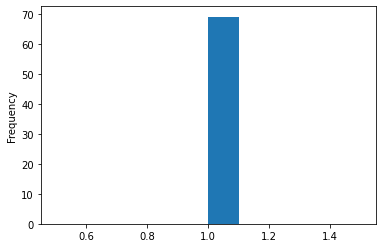

In [8]:
# Feature distribution
df['Floor'].plot(kind = 'hist') 

Переменная оказалась не вариативная, все магазины распологаются на 1-ом этаже. Следовательно она не несет нужной информации для дальнейшей работы и ее следует удалить с датасета.

<AxesSubplot:ylabel='Frequency'>

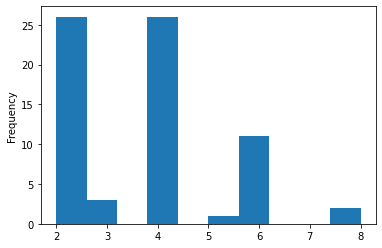

In [9]:
# Feature distribution
df['Number_of_employees_in_the_state'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

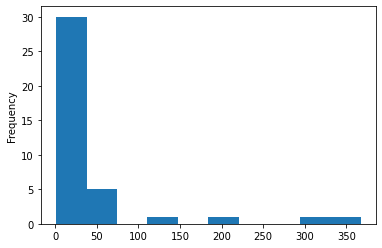

In [10]:
# Feature distribution
df['NumberOfReviewInGoogle'].plot(kind = 'hist')

Видим, что есть хвост, который похож на выброс

<AxesSubplot:ylabel='Frequency'>

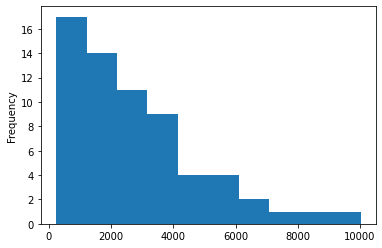

In [11]:
# Feature distribution
df['human_traffic'].plot(kind = 'hist')

Сразу видно, что переменная распределена не по нормальному закону. Наблюдается небольшой хвост. Следует в дальнейшем проверить ее на выбросы.

<AxesSubplot:ylabel='Frequency'>

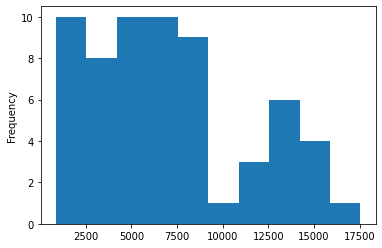

In [12]:
# Feature distribution
df['NumberOfChecksPerMonth'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

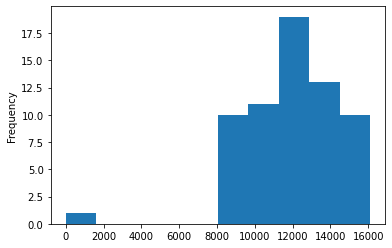

In [13]:
# Feature distribution
df['AverageIncomeOfThePopulation'].plot(kind = 'hist')

Явно есть выбросы, на которые стоить обратить внимание

# STATISTICS

In [14]:
# Dataset Statistics
df.describe()

,Floor,Number_of_employees_in_the_state,NumberOfReviewInGoogle,NumberOfChecksPerMonth,human_traffic,AverageIncomeOfThePopulation,Stop_GT,Stop_GT_at_home,The_final_stop_of_the_GT,Crosswalk,Specialized_bread
count,69.0,69.000000,39.000000,62.000000,64.000000,64.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,1.0,3.652174,42.820513,7097.209677,2755.765625,11990.421875,0.362319,0.275362,0.086957,0.333333,0.318841
std,0.0,1.607209,81.975565,4275.181297,2058.993750,2570.309158,0.484192,0.449969,0.283836,0.474858,0.469441
min,1.0,2.000000,1.000000,878.000000,233.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,2.000000,5.000000,3661.000000,1148.500000,10850.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,4.000000,12.000000,6430.500000,2208.000000,12250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,4.000000,33.000000,9070.750000,3998.750000,13492.500000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.0,8.000000,367.000000,17537.000000,10016.000000,16100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Описательная статистика выводит только количественные переменные. Соответсвенно в модели их 11. Переменная Human_traffic, Number of reviews in Google, Average income of the population имеет пропуски. А так же есть переменные, которые содержит значения, выходящие за 3 сигма.

# Missing data

In [15]:
# Cheking Missing data
df.isnull().sum()

RetailSpace                                  0
Floor                                        0
Number_of_employees_in_the_state             0
Type                                         0
NumberOfReviewInGoogle                      30
NumberOfChecksPerMonth                       7
The_average_number_of_units_in_the_check     7
human_traffic                                5
AverageIncomeOfThePopulation                 5
Stop_GT                                      0
Stop_GT_at_home                              0
The_final_stop_of_the_GT                     0
Crosswalk                                    0
Specialized_bread                            0
Success                                      0
dtype: int64

Как видим, 5 переменных содержат пропуски. Далее следует их заполнить

In [16]:
#!pip install sklearn

In [17]:
# Taking care of missing data
dfm = df

from sklearn.impute import SimpleImputer
#numeric
'''SimpleImputer - класс
imputer_mean - экземпляр
fit - метод класса'''


imputer_freq = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['human_traffic']] = imputer_freq.fit_transform(dfm[['human_traffic']])

imputer_freq = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['NumberOfReviewInGoogle']] = imputer_freq.fit_transform(dfm[['NumberOfReviewInGoogle']])

imputer_freq = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['AverageIncomeOfThePopulation']] = imputer_freq.fit_transform(dfm[['AverageIncomeOfThePopulation']])

imputer_freq = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['NumberOfChecksPerMonth']] = imputer_freq.fit_transform(dfm[['NumberOfChecksPerMonth']])

imputer_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
dfm[['The_average_number_of_units_in_the_check']] = imputer_freq.fit_transform(dfm[['The_average_number_of_units_in_the_check']])

In [18]:
# Cheking Missing data

dfm.isnull().sum()

RetailSpace                                 0
Floor                                       0
Number_of_employees_in_the_state            0
Type                                        0
NumberOfReviewInGoogle                      0
NumberOfChecksPerMonth                      0
The_average_number_of_units_in_the_check    0
human_traffic                               0
AverageIncomeOfThePopulation                0
Stop_GT                                     0
Stop_GT_at_home                             0
The_final_stop_of_the_GT                    0
Crosswalk                                   0
Specialized_bread                           0
Success                                     0
dtype: int64

Итак, переменные больше не содержат пропуски.

# Outliers

In [19]:
# Outliers
human_traffic = []
for hf in dfm['human_traffic']:
    if hf > round(dfm['human_traffic'].mean() + 3*dfm['human_traffic'].std()):
        hf = round(dfm['human_traffic'].mean() + 3*dfm['human_traffic'].std()) 
    human_traffic.append(hf)
dfm['human_traffic'] = human_traffic

In [20]:
dfm['human_traffic'].describe()

count      69.000000
mean     2736.707654
std      1916.244139
min       233.000000
25%      1296.000000
50%      2269.000000
75%      3880.000000
max      8701.000000
Name: human_traffic, dtype: float64

In [21]:
# Outliers
NumberOfReviewInGoogle = []
for num in dfm['NumberOfReviewInGoogle']:
    if num > round(dfm['NumberOfReviewInGoogle'].mean() + 3*dfm['NumberOfReviewInGoogle'].std()):
        num = round(dfm['NumberOfReviewInGoogle'].mean() + 3*dfm['NumberOfReviewInGoogle'].std()) 
    NumberOfReviewInGoogle.append(num)
dfm['NumberOfReviewInGoogle'] = NumberOfReviewInGoogle

In [22]:
dfm['NumberOfReviewInGoogle'].describe()


count     69.000000
mean      39.371237
std       44.994343
min        1.000000
25%       12.000000
50%       42.820513
75%       42.820513
max      227.000000
Name: NumberOfReviewInGoogle, dtype: float64

In [23]:
# Outliers
AverageIncomeOfThePopulation = []
for num in dfm['AverageIncomeOfThePopulation']:
    if num < round(dfm['AverageIncomeOfThePopulation'].mean() - 3*dfm['AverageIncomeOfThePopulation'].std()):
        num = round(dfm['AverageIncomeOfThePopulation'].mean() - 3*dfm['AverageIncomeOfThePopulation'].std()) 
    AverageIncomeOfThePopulation.append(num)
dfm['AverageIncomeOfThePopulation'] = AverageIncomeOfThePopulation

In [24]:
dfm['AverageIncomeOfThePopulation'].describe()

count       69.000000
mean     12056.624774
std       2193.669141
min       4568.000000
25%      11060.000000
50%      12180.000000
75%      13300.000000
max      16100.000000
Name: AverageIncomeOfThePopulation, dtype: float64

In [25]:
dfm.describe()

,Floor,Number_of_employees_in_the_state,NumberOfReviewInGoogle,NumberOfChecksPerMonth,human_traffic,AverageIncomeOfThePopulation,Stop_GT,Stop_GT_at_home,The_final_stop_of_the_GT,Crosswalk,Specialized_bread
count,69.0,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,1.0,3.652174,39.371237,7097.209677,2736.707654,12056.624774,0.362319,0.275362,0.086957,0.333333,0.318841
std,0.0,1.607209,44.994343,4049.160556,1916.244139,2193.669141,0.484192,0.449969,0.283836,0.474858,0.469441
min,1.0,2.000000,1.000000,878.000000,233.000000,4568.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,2.000000,12.000000,3734.000000,1296.000000,11060.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,4.000000,42.820513,6810.000000,2269.000000,12180.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,4.000000,42.820513,8548.000000,3880.000000,13300.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.0,8.000000,227.000000,17537.000000,8701.000000,16100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Таким образом удалены выбросы в переменных, в которых было соответствующее подозрение.

# Encoding

In [26]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [27]:
dfm.shape

(69, 15)

In [28]:
# Encoding categorical data
dfm = encoding_char(dfm)
dfm.head (10)

,RetailSpace,Floor,Number_of_employees_in_the_state,Type,NumberOfReviewInGoogle,NumberOfChecksPerMonth,The_average_number_of_units_in_the_check,human_traffic,AverageIncomeOfThePopulation,Stop_GT,Stop_GT_at_home,The_final_stop_of_the_GT,Crosswalk,Specialized_bread,Success
0,0,1,2,0,42.820513,1230.0,0,5211.0,15610.0,1,1,0,0,1,0
1,1,1,2,0,8.000000,2715.0,1,2424.0,12600.0,1,1,1,0,0,0
2,2,1,2,1,42.820513,878.0,2,3868.0,12600.0,1,1,0,1,1,0
3,3,1,2,1,42.820513,2346.0,3,4546.0,13930.0,1,1,0,0,1,0
4,1,1,2,1,42.820513,2542.0,4,3244.0,16030.0,0,0,0,0,0,0
5,4,1,2,0,9.000000,5478.0,5,2560.0,12320.0,0,0,0,0,1,0
6,5,1,4,0,21.000000,9115.0,6,1842.0,16100.0,0,0,0,1,0,1
7,6,1,6,0,227.000000,14777.0,7,412.0,12180.0,0,0,0,0,1,1
8,7,1,2,0,42.820513,2734.0,8,233.0,13930.0,0,0,0,0,0,0
9,8,1,2,0,17.000000,6322.0,9,978.0,14560.0,0,0,0,1,0,0


Данные были закодированы

In [32]:
#!pip install seaborn

# Correlations

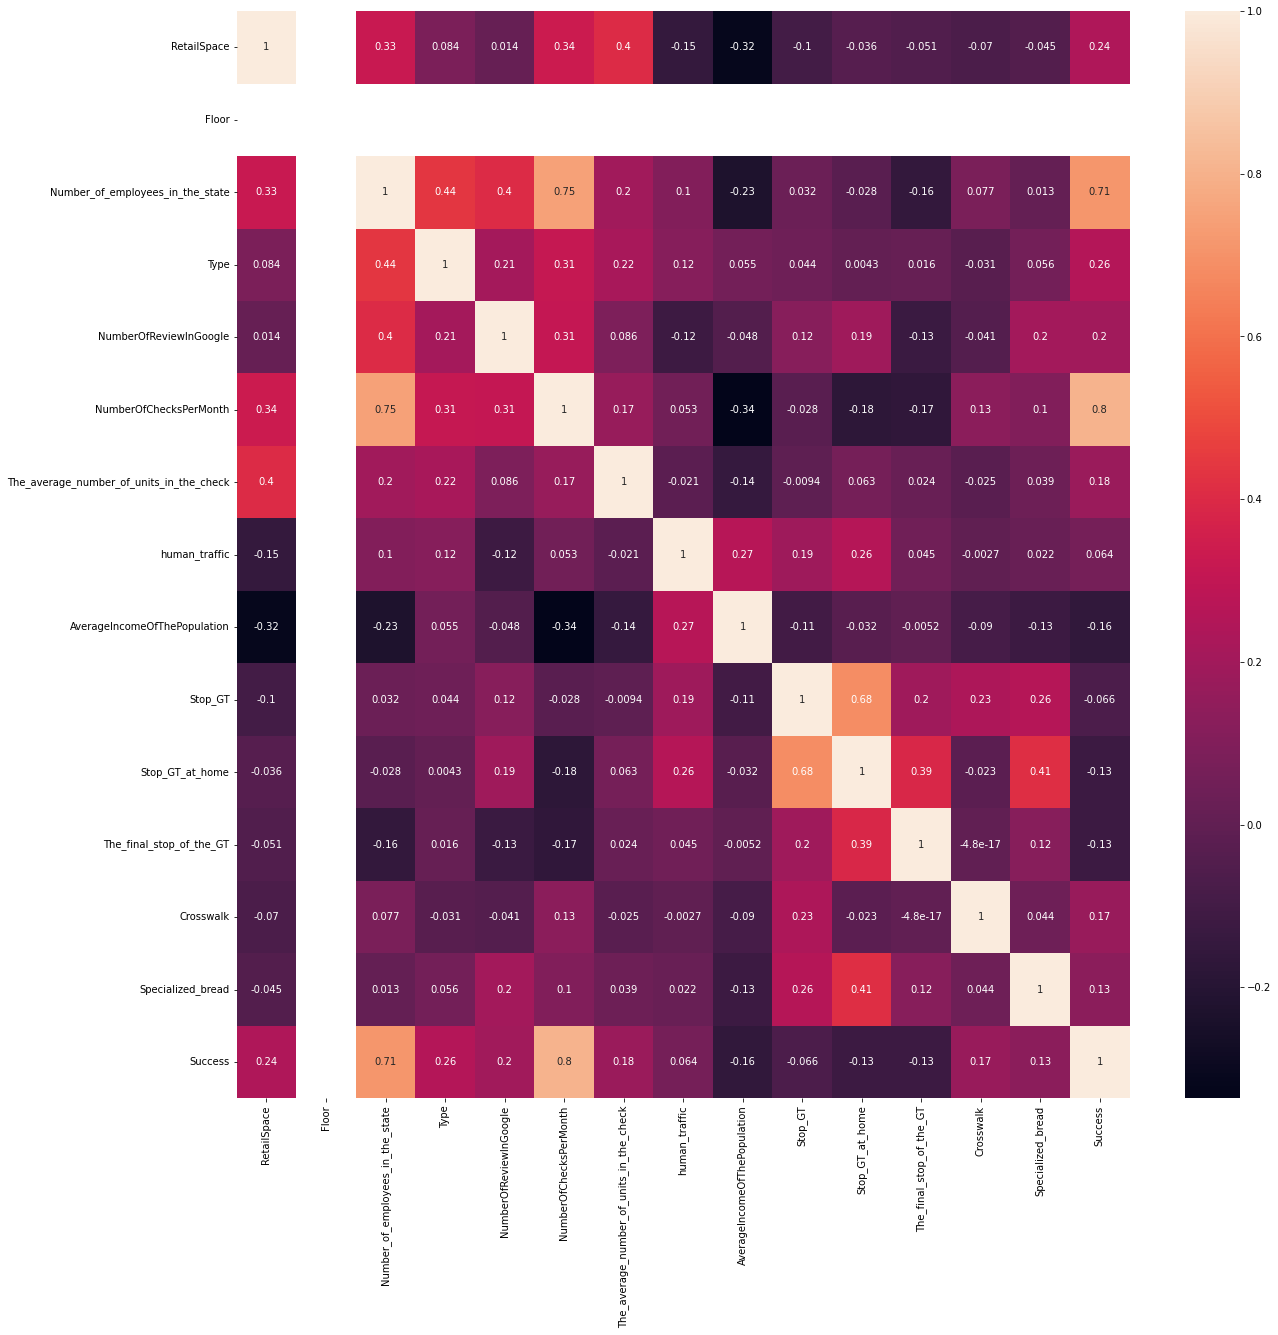

In [33]:
# Cheking correlations
import seaborn as sns
corrmat = dfm.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, annot=True)
plt.show()

In [39]:
# Removing Correlated Data
dfr = dfm.drop(['Floor','Number_of_employees_in_the_state','NumberOfChecksPerMonth','Stop_GT_at_home'], axis='columns', inplace=False)
dfr.shape

(69, 11)

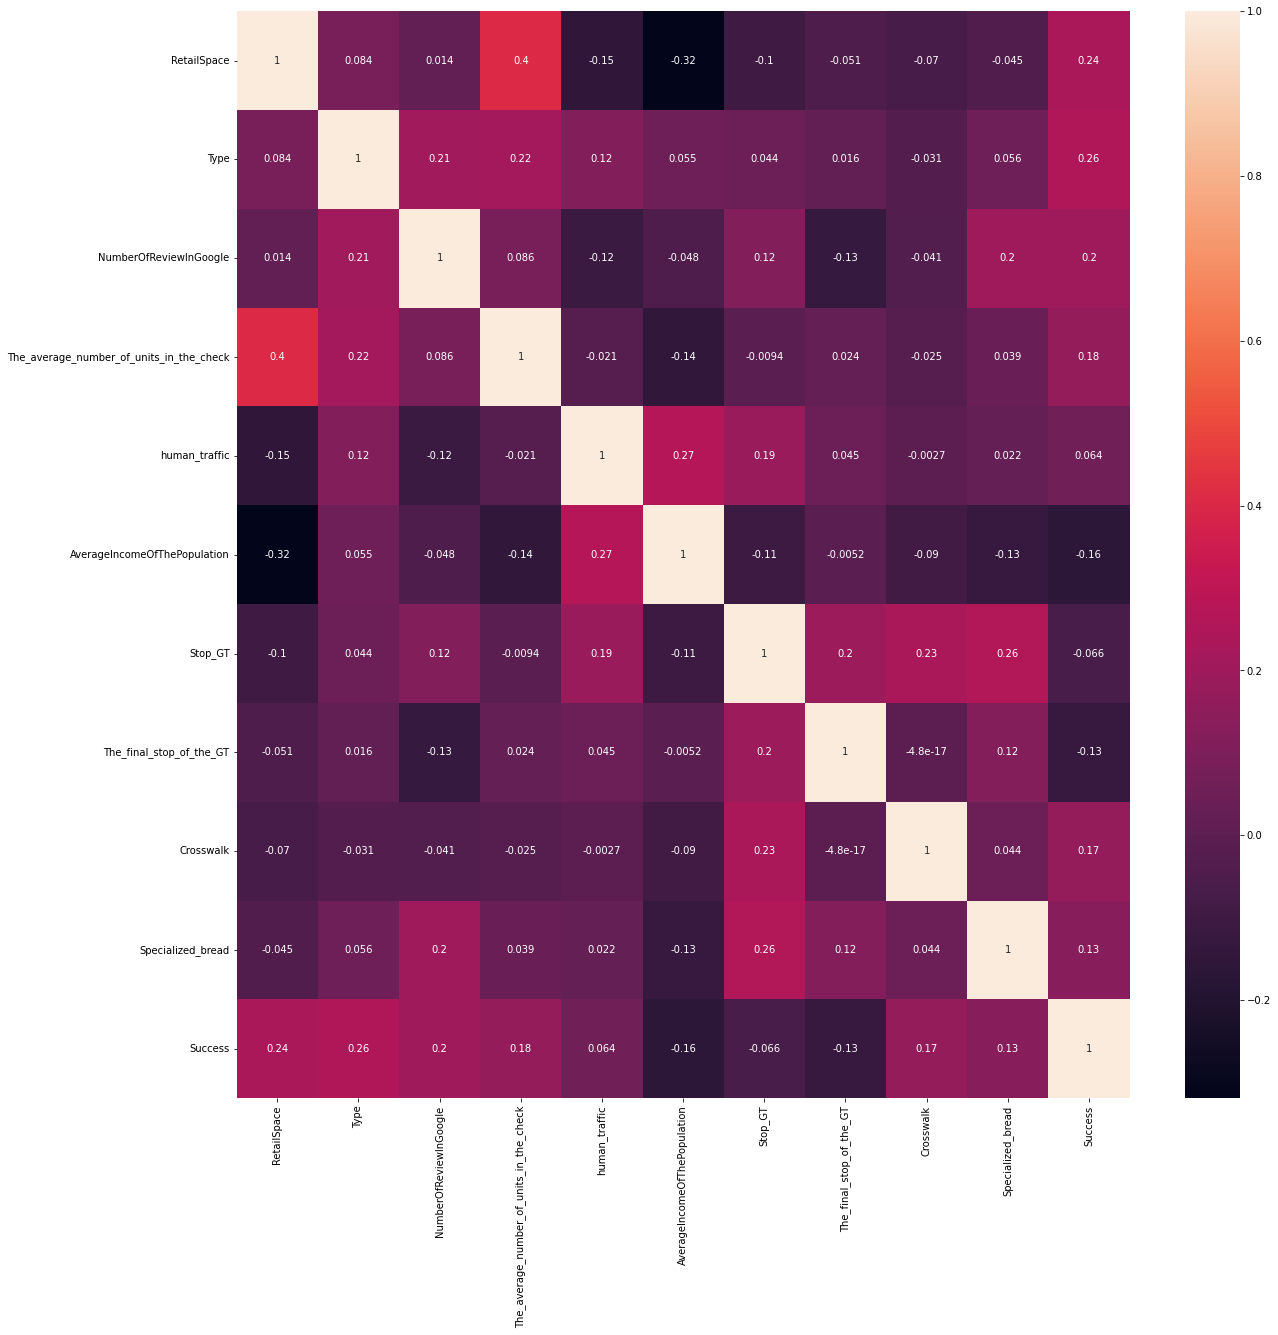

In [40]:
# Cheking correlations
import seaborn as sns
corrmat = dfr.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, annot=True)
plt.show()

Из модели были убраны сильно коррелируемые переменные. Таким образом, данные подготовлены для дальнейшей работы и могут быть использованы для псотроения моделей классификации и кластеризации.

In [41]:
# Exporting the dataset
dfr.to_csv('kr_2.csv', sep=';', index=False)